# Aprendizaje Supervisado
#### Cristobal Donoso
##### 26 Junio de 2021

<center><img src="./figures/pipeline.png" width=1920 height=1080><center>


<center><img src="./figures/pipeline2.png" width=1920 height=1080><center>


<center><img src="./figures/pipeline3.png" width=1920 height=1080><center>


# Identificar los datos necesarios

- Conocimiento Experto: Caracteristicas o atributos
- Simulaciones -> [(series de tiempo)](https://github.com/TimeSynth/TimeSynth)
- WebScrapping -> [(tutorial aqui)](https://github.com/cridonoso/IntroToDataScience/blob/master/3-WebScraping/webScraping.ipynb)
- Fuerza Bruta - _no recomendado (Zhang et al., 2002)_

# Preprocesamiento
## Datos faltantes o Missing values

<center><img src="./figures/missingtypes.png" width=1920 height=1080><center>

<i><p style='{ font-family: Arial; font-size: 20px;}'>
Little, R. J. A., & Rubin, D. R. (1987).Statistical analysis with missing data. New York: John Wiley & Sons.
</p></i>

# Ejercicios
## 1. Identifique el tipo de Valor Faltante 


>Se extrae una muestra aleatoria desde una poblacion de personas (todos con igual probabilidad de ser elegidos). Debido a que seleccionamos un subconjunto de la poblacion parte de la informacion no sera observada.



# Ejercicios
## 2. Identifique el tipo de Valor Faltante 


> El procentaje de aprobacion de cierta autoridad, desarrollada por el grupo de amigos de la autoridad, resultaron  positivos pese a las numerosas protestas que incluyen al 90% de la poblacion.


# Ejercicios
## 3. Identifique el tipo de Valor Faltante 


> Quien trasladaba las muestras de PCR aplicados a un grupo de ancianos en la comuna de Loncoche tropieza con un gato que perseguia a un grillo. Dos muestras se pierden despues del accidente.



# Ejercicios
## 4. Identifique el tipo de Valor Faltante 


> Cierta persona no se presento a dar el examen de conducir puesto que contrajo COVID-19.



# Como lidiar con valores faltantes





### Generando datos

In [1]:
import pandas as pd 
import numpy as np

N = 1000
id_person = np.arange(N)
edades = np.random.randint(5, 80, N)
pesos = np.round(np.random.uniform(30, 120, N), 1)
estaturas = np.round(np.random.uniform(1, 2, N), 1)
mcis = pesos/np.power(estaturas, 2)

In [2]:
def insert_nan(lista, n=2):
    lista = lista.astype(object)
    lista[np.random.randint(0, len(lista), n)] = np.nan
    return lista

In [3]:
df = pd.DataFrame()
df['id'] = id_person
df['edad'] = insert_nan(edades, 10)
df['peso'] = insert_nan(pesos, 10)
df['estaturas'] = insert_nan(estaturas, 10)
df['mci'] = insert_nan(mcis, 10)
df.sample(10)

,id,edad,peso,estaturas,mci
565,565,57,69.0,1.6,26.953125
619,619,65,35.9,1.4,18.316327
666,666,38,54.6,1.1,45.123967
329,329,25,94.4,1.6,36.875
430,430,74,116.9,1.4,59.642857
920,920,17,81.5,1.5,36.222222
345,345,74,87.6,1.4,44.693878
652,652,56,55.5,1.9,15.373961
474,474,24,35.2,1.3,20.828402
236,236,35,113.9,1.9,31.551247


# Metodos para tratar con valores Faltantes
1. **Ignorar o Descartar los datos**

In [4]:
df.isna().any()

condicion = df['estaturas'].isnull()
df[~condicion].sample(2)

,id,edad,peso,estaturas,mci
177,177,76,42.2,1.4,21.530612
37,37,37,114.8,1.5,51.022222


# Metodos para tratar con valores Faltantes
1. Ignorar o Descartar los datos
2. **Estimacion de parametros**

<i><p style='{ font-family: Arial; font-size: 20px;}'>
Fuente: Batista, G. E., & Monard, M. C. (2003). An analysis of four missing data treatment methods for supervised learning. Applied artificial intelligence, 17(5-6), 519-533.
</p></i>

# Metodos para tratar con valores Faltantes
1. Ignorar o Descartar los datos
2. Estimacion de parametros
3. **Imputación**
    - Susticion: Por ejemplo reemplazar una persona que no puede ser contactada por otra que si haya dado su numero de contacto
    - Media o Moda
    - Hot Deck y Cold Deck: Particionar los datos en clusters. Luego cada instancia con valores faltantes es asignada a algun cluster. Finalmente, se reemplaza con la media o moda.
    - Modelo predictivo: Consiste en ajustar un modelo predictivo para estimar valores faltantes.
    
<i><p style='{ font-family: Arial; font-size: 20px;}'>
Fuente: Batista, G. E., & Monard, M. C. (2003). An analysis of four missing data treatment methods for supervised learning. Applied artificial intelligence, 17(5-6), 519-533.
</p></i>

In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")

df_1 = df.iloc[:100]
df_2 = df.iloc[100:]

imputer = imputer.fit(df_1)

df_3 = imputer.transform(df_2)

r = imputer.fit_transform(df)

df2 = pd.DataFrame(r)
df2.columns = df.columns
df2
print(df_2.isna().any())
print(np.isnan(df_3).any())

id           False
edad          True
peso          True
estaturas     True
mci           True
dtype: bool
False


https://scikit-learn.org/stable/modules/impute.html

# Preprocesamiento 

### Formatear las etiquetas

In [6]:
df['Class'] = df['mci'] > 30
df.head()

,id,edad,peso,estaturas,mci,Class
0,0,14,67.9,1.2,47.152778,True
1,1,56,107.8,1.3,63.786982,True
2,2,9,70.9,2.0,17.725,False
3,3,60,97.9,1.7,33.875433,True
4,4,59,49.3,1.9,13.65651,False


In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
labels = le.fit_transform(df['Class'])

df['Label'] = labels
df.sample(3)

,id,edad,peso,estaturas,mci,Class,Label
500,500,59,99.1,1.8,30.58642,True,1
901,901,33,118.7,1.3,70.236686,True,1
469,469,23,114.6,1.4,58.469388,True,1


## One-hot encoding

In [8]:
onehot = pd.get_dummies(df['Label'])

onehot.columns = ['Normal', 'Sobrepeso']

df_nuevo = pd.concat([df, onehot], 1) # anadir a columnas
df_nuevo.sample(3)

,id,edad,peso,estaturas,mci,Class,Label,Normal,Sobrepeso
526,526,65,112.6,1.2,78.194444,True,1,0,1
305,305,52,117.4,1.6,45.859375,True,1,0,1
266,266,59,43.2,1.0,43.2,True,1,0,1


# Normalizacion de datos

In [9]:
from sklearn.preprocessing import MinMaxScaler

# valor_normalizado_entre_0_y_1 = (valor - valor_min) / (valor_max - valor_min)

scaler = MinMaxScaler()
df_normed = scaler.fit_transform(df2.iloc[:, 1:5])
df_normed

array([[0.12162162, 0.42140468, 0.2       , 0.35429911],
       [0.68918919, 0.86622074, 0.3       , 0.50358521],
       [0.05405405, 0.4548495 , 1.        , 0.0901952 ],
       ...,
       [0.02702703, 0.5574136 , 0.7       , 0.17986325],
       [0.06756757, 0.22742475, 0.9       , 0.0566652 ],
       [0.27027027, 0.67112598, 0.2       , 0.49390472]])

In [10]:
from sklearn.preprocessing import StandardScaler

# value_z = (value - media) / std = 0.00001

scaler = StandardScaler()
df_standard = scaler.fit_transform(df2.iloc[:, 1:5])
df_standard

array([[-1.26677349, -0.32866485, -1.03864175,  0.42819891],
       [ 0.64640318,  1.22118298, -0.68409601,  1.23202987],
       [-1.49453261, -0.21213494,  1.79772418, -0.99386844],
       ...,
       [-1.58563626,  0.14522346,  0.73408696, -0.51105085],
       [-1.44898079, -1.00453834,  1.44317844, -1.17441071],
       [-0.76570341,  0.54142516, -1.03864175,  1.17990527]])

<center><img src="./figures/pipeline3.png" width=1920 height=1080><center>


# Separar conjunto de entrenamiento

> Por que debemos dividir nuestro conjunto de entrenamiento?

- **Train**: Ajustar Parametros
- **Validacion**: Evaluar que tan bien generaliza el modelo durante el entrenamiento. Tambien nos permite definir criterios de convergencia en algoritmos de optimizacion iterativos.
- **Test**: Evaluacion final de nuestro modelo sobre un conjunto de datos nunca antes observado

In [11]:
from sklearn.model_selection import train_test_split

X = df_standard
y = df['Label'].values


In [12]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(500, 4) (500,)
(250, 4) (250,)
(250, 4) (250,)


# Seleccion de Algoritmo

<center><img src="./figures/tabla_algoritmos.png" width=1200 height=700><center>

<i><p style='{ font-family: Arial; font-size: 12px;}'>
Fuente: Kotsiantis, S. B., Zaharakis, I., & Pintelas, P. (2007). Supervised machine learning: A review of classification techniques. Emerging artificial intelligence applications in computer engineering, 160(1), 3-24.
</p></i>

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier()

model = clf.fit(X_train, y_train)

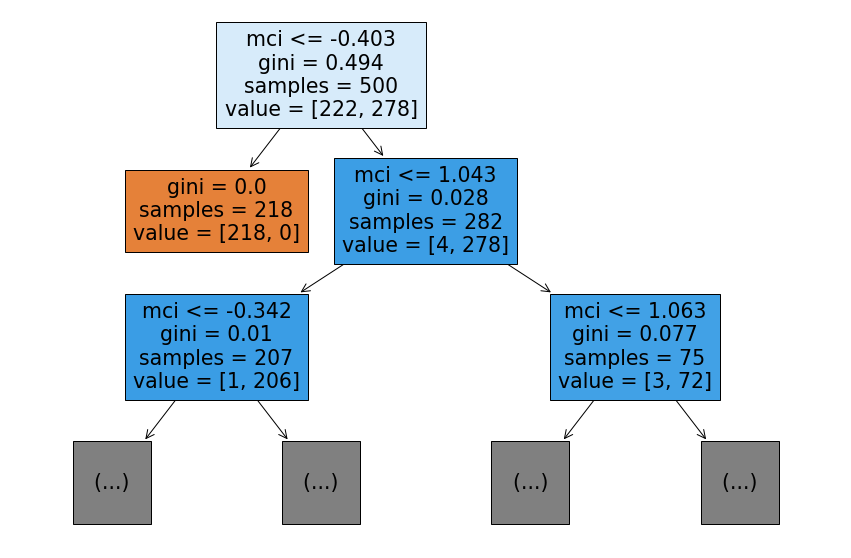

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=df2.iloc[:, 1:5].columns,  
                   filled=True, max_depth=2
                  )

### Metricas de evaluacion

<center><img src="./figures/prec_recall.png" width=1920 height=1080><center>


In [16]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.988

In [17]:
from sklearn.metrics import precision_recall_fscore_support

prec, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

print('precision: {} recall: {} F1: {}'.format(prec, recall, f1))

precision: 0.990066225165563 recall: 0.9852941176470589 F1: 0.987520591024809


In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 99,   3],
       [  0, 148]])

In [19]:
import seaborn as sns


def plot_cm(cm, ax, title='CM', cmap='Blues', fontsize=15, cbar=False, yticklabels=True, class_names=None):
    '''
    Plot Confusion Matrix
    '''
    labels = np.zeros_like(cm, dtype=np.object)
    mask = np.ones_like(cm, dtype=np.bool)
    for (row, col), value in np.ndenumerate(cm):
        if value != 0.0:
            mask[row][col] = False
        if value < 0.01:
            labels[row][col] = '< 1%'
        else:
            labels[row][col] = '{:2.1f}%'.format(value*100)

    ax = sns.heatmap(cm, annot = cm, fmt = '2.2f',
                     annot_kws={"size": fontsize},
                     cbar=cbar,
                     ax=ax,
                     linecolor='white',
                     linewidths=1,
                     vmin=0, vmax=1,
                     cmap=cmap,
                     mask=mask,
                     yticklabels=yticklabels)

    if yticklabels and class_names is not None:
        ax.set_yticklabels(class_names, rotation=0, fontsize=fontsize+1)

    ax.set_title(title, fontsize=fontsize+2)

    ax.axhline(y=0, color='k',linewidth=4)
    ax.axhline(y=cm.shape[1], color='k',linewidth=4)
    ax.axvline(x=0, color='k',linewidth=4)
    ax.axvline(x=cm.shape[0], color='k',linewidth=4)

    return ax

<AxesSubplot:title={'center':'CM'}>

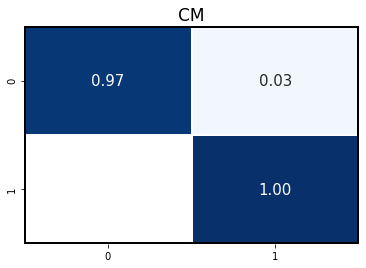

In [20]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,1)
cm = confusion_matrix(y_test, y_pred, normalize='true')
plot_cm(cm, ax)

# Busqueda de  Hiperparametros

In [21]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

svc = SVC()

In [22]:
parameters = {'kernel':('linear', 'rbf')}

In [23]:
clf = GridSearchCV(svc, parameters)

clf = clf.fit(X_train, y_train)

In [24]:
for k, m1, m2 in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score'], clf.cv_results_['std_test_score']):
    print('{} - {:.2f} +- {:.2f}'.format(k['kernel'], m1, m2))

linear - 0.97 +- 0.02
rbf - 0.94 +- 0.02


# Cross Validation

La Validacion Cruzada (o cross-validation) es una tecnica de testing en aprendizaje automatico, la cual nos permite evaluar (estadisticamente) la capacidad de generalizacion de nuestros modelos.

<center><img src="./figures/xval.png" width=1280 height=720><center>

<i><p style='{ font-family: Arial; font-size: 12px;}'>
https://commons.wikimedia.org/wiki/File:K-fold_cross_validation_EN.svg
</p></i>

https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn.model_selection import KFold

# Data
X = df_standard
y = df['Label'].values

kf = KFold(n_splits=5)

precision = []
for train, test in kf.split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    print(X_train.shape)
    # Entrenar el modelo
    # ----
    # Evaluar el modelo
    prec_value = fn(y_test, y_pred)
    # ----
    # Guardar metricas
    precision.append(prec_value)

np.mean(precision)
np.std(precision)

# Recursos Extra

https://github.com/cridonoso/IntroToDataScience/tree/master/5-Classification